# Fitting Models to Astronomy Data with Linear Regression
<small>Christina Hedges, 2024, TESS Interactive Data Workshop</small>

In astronomy we often have **data** and need to know how to build a **model** which will help us interpret the physical processes that could have created that data.

In this tutorial, we'll work through one method to do this: fitting simple linear models with **linear regression**.

<small>*Note: This content is adapted from [Building Fast Linear Models for Astronomers](https://christinahedges.github.io/BuildingFastLinearModels/), which goes into greater detail on all these points.*</small>

In astronomy data we often have multiple signals both from our astrophysical objects of interest and some systematic noise terms. We might be looking at

- 1D time series data
- 2D imaging data
- 3D data of images over time
- Higher dimensional data from catalogs

And we frequently want to remove some **systematics**, to get our best understanding of the truth. "Systematics" is an astronomy catch-all term that might mean something like

- A systematic offset in image frames due to sky background
- A systematic and predictable signal in our time-series data due to thermal changes in an instrument
- A systematic increase in brightness in a spectrum at the faint end

And many others.

So how do we get the true flux of a star in an image with a systematic brightness? How do we detrend our noisy time series to remove the impact of thermal changes and preserve the true signal? How do we get accurate spectra?

And, crucially, how do we do it *fast*.

We're going to have to come up with some **model** for our data. This means modeling our systematics, and any astrophysical signal that's in our data, at the same time. We're going to do this with a **linear model**.

# What's a Linear Model?

Here's a set of linear equations that have the same variables stored in the two element vector $\mathbf w$

$y_0 = w_0 \cdot x_0 + w_1$

$y_1 = w_0 \cdot x_1 + w_1$

$y_2 = w_0 \cdot x_2 + w_1$


This set of linear equations share the same variable $\mathbf w$. The relationship between the vector $\mathbf{y}$ and vector $\mathbf{x}$ is a linear combination of $\mathbf{x}$ dotted with some coefficients. The equation below does not have a linear between relationship between the vector $\mathbf{y}$ and vector $\mathbf{x}$

$\mathbf y = e ^{w_1 \cdot \mathbf{x}} + w_2$



## Matrix Notation

Matrix notation is going to become helpful for us in this workbook. Let's express the above set of linear equations as a matrix multiplication. 

$ \mathbf y = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \end{bmatrix} \cdot \mathbf w$

where

$\mathbf w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$


We could also write the first equation ($\mathbf y = 2 \mathbf x + 3$) as a matrix multiplication

$\mathbf y = \mathbf A \cdot \mathbf w$

Where 

$ \mathbf w = \begin{bmatrix} 2 & 3 \end{bmatrix}$ and $ \mathbf A = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ .. & .. \\ x_n & 1 \end{bmatrix}$

$ \mathbf y = \mathbf A \cdot \mathbf w = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ .. & ..\\ x_n & 1 \end{bmatrix} \cdot \begin{bmatrix} 2 \\ 3 \end{bmatrix}$

Putting in some values for x we find:

$ \begin{bmatrix} 3 & 5 & 7 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\ 2 & 1 \end{bmatrix} \cdot \begin{bmatrix} 2 \\ 3 \end{bmatrix}$

## Bigger Linear Models

So long as we can write our model as something that is a set of column vector regressors with a shared set of weights, we are writing a linear model that we can solve. Your model will look like this:

$\mathbf{y} = \mathbf{A} \cdot \mathbf{w}$

$\mathbf{A} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
x_{3,0} & x_{3,1} & x_{3,2} & .. & x_{3,n} \\
x_{4,0} & x_{4,1} & x_{4,2} & .. & x_{4,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} $ and $\mathbf{w} = \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix} $

$ \begin{bmatrix} y_{0}\\ y_{1}\\ y_{2} \\..\\ y_{n}\end{bmatrix} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
x_{3,0} & x_{3,1} & x_{3,2} & .. & x_{3,n} \\
x_{4,0} & x_{4,1} & x_{4,2} & .. & x_{4,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} \cdot \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix}$

A higher order polynomial is a set of linear equations. For example, let's imagine we have a vector of times $\mathbf{t}$ for some time series, with $m$ elements. You can write a $n$th order polynomial in this "time" variable as

$ \mathbf{y} = \begin{bmatrix} t_{0}^0 & t_{0}^1 & t_{0}^2 & .. & t_{0}^n \\
t_{1}^0 & t_{1}^1 & t_{1}^2 & .. & t_{1}^n \\
t_{2}^0 & t_{2}^1 & t_{2}^2 & .. & t_{2}^n \\
t_{3}^0 & t_{3}^1 & t_{3}^2 & .. & t_{3}^n \\
t_{4}^0 & t_{4}^1 & t_{4}^2 & .. & t_{4}^n \\
.. & .. & .. & .. & .. \\
t_{m}^0 & t_{m}^1 & t_{m}^2 & .. & t_{m}^n \\\end{bmatrix} \cdot \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix}$


## Fitting These Models

Now that we have a way to write down linear models, how do we solve them? 

Let's solve this [small set of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations):

\begin{cases}3x+2y-z=1\\2x-2y+4z=-2\\-x+{\frac {1}{2}}y-z=0\end{cases}

We'll write this in Python

In [1]:
import numpy as np
# Set up y vector
y = np.asarray([1, -2, 0])
# Set up design matrix
A = np.asarray([[3, 2, -1], [2, -2, 4], [-1, 0.5, -1]])

Now we'd like to solve the equation 

$\mathbf y = \mathbf A \cdot \mathbf w$

There are lots of ways to solve sets of linear equations, and I recommend you take a quick look at this point at [Python Programming and Numerical Methods - A Guide for Engineers and Scientists "Solutions to Systems of Linear Equations" section](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.04-Solutions-to-Systems-of-Linear-Equations.html)) for some examples of how this "solving" happens.

Luckily for us, `numpy` has built in some of the solvers that are discussed above! We can use the `solve` function! `solve` will use methods such as LU decomposition to find $\mathbf{w}$ given $\mathbf{A}$ and $\mathbf{y}$

In [2]:
# Use `numpy` linalg solve to find the answer
np.linalg.solve(A, y)

array([ 1., -2., -2.])

In the above cell we've set up our system of linear equations and used `numpy`'s `linalg.solve` to find $x$, $y$, 
and $z$ respectively. 

This is great! Let's apply it to something that's a bit closer to what we need to do in astronomy.

In [3]:
n = 200 # the number of data points
m = 4 # the order of our polynomial
x = np.linspace(-1, 1, n)
A = np.vstack([x**idx for idx in range(m)]).T

# In this step, I'm going to make some fake data for us to fit
true_w = np.random.normal(size=m)
data = A.dot(true_w) + np.random.normal(0, 0.1, size=x.shape[0])

/Users/chedges/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


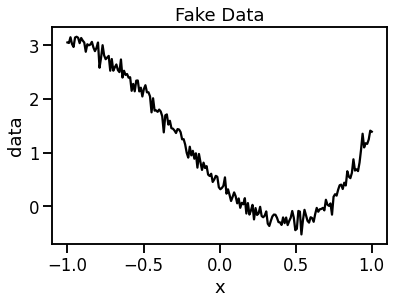

In [4]:
import matplotlib.pyplot as plt; import seaborn as sns; sns.set_context("talk")
fig, ax = plt.subplots()
plt.plot(x, data, c='k')
ax.set(xlabel='x', ylabel='data', title='Fake Data');

I generated this data with a matrix $\mathbf A$ and randomly generated some "true" value for $\mathbf w$. Now we'd like to solve the equation 

$\mathbf y = \mathbf A \cdot \mathbf w$

Let's try `numpy`'s solve again

In [5]:
np.linalg.solve(A, data)

LinAlgError: Last 2 dimensions of the array must be square

Oh dear. No we can't.

We can't solve this system of equations as we've written it because $\mathbf A$ is not square. All the methods above $\mathbf A$ to be square. (In our description of linear models this means we need the same number of linear equations as we have coefficients to find.)

We're going to have to try to do something else.

### The Normal equation

Let's unpack what we're trying to do. We have a "hypothesis" function, some function that will give us a possible set of values to fit our data. Our hypothesis here is that the data is well fit by a polynomial with some weights. Our hypothesis is a function of guess weights

$\mathbf w = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ .. \\ w_n \end{bmatrix}$


and input regressor vectors column vectors

$\mathbf{X} = \begin{bmatrix}\mathbf x_0 & \mathbf x_1 &\mathbf x_2 & .. & \mathbf x_n  \end{bmatrix} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
x_{3,0} & x_{3,1} & x_{3,2} & .. & x_{3,n} \\
x_{4,0} & x_{4,1} & x_{4,2} & .. & x_{4,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} $

Written out as an equation the hypothesis function is

$h(w) = w_0 \mathbf x_0 + w_1 \mathbf x_1 + w_2 \mathbf x_2...+ w_n \mathbf x_n$


The residuals between our data $\mathbf y$ and our hypothesis function is given as $\mathbf{y}$ - $\mathbf{h}_w(\mathbf x)$.

**To find the best fitting model, we would like to minimize these residuals to fit our model.** 

As is commonly done, we're going to minimize the square of the residuals to find the best fitting model. To do this, we write some **cost function**

<center>$J(\boldsymbol w) = \frac{1}{2n}\sum_{i=1}^m (y_i$ - $h_w(x_i))^2$</center>

<small>where $m$ is the number of samples (i.e. how many data points we have) and n is the number of regressors we have.</small>

Minimizing our cost function $J$ gives us the best fitting weights to the data.

In matrix notation we can write
<center>$J(\boldsymbol w) = \frac{1}{2n}\sum_{i=1}^m (y_i$ - $h_w(x_i))^2 = \frac{1}{2n} (\mathbf X \cdot \boldsymbol w - \mathbf y)^T\cdot(\mathbf X \cdot \boldsymbol w - \mathbf y)$</center>

Let's see what this looks like in the problem we made before

In [6]:
print('n:', n)
print('m:', m)

print('first 5 rows of our design matrix:\n', A[:5])

n: 200
m: 4
first 5 rows of our design matrix:
 [[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.98994975  0.98000051 -0.97015125]
 [ 1.         -0.9798995   0.96020303 -0.94090246]
 [ 1.         -0.96984925  0.94060756 -0.91224753]
 [ 1.         -0.95979899  0.92121411 -0.88418038]]


In [7]:
# Here are some random weights
guess_weights = np.random.normal(size=m)

# Below I write the cost function
# (X.dot(theta) - y).T.dot(X.dot(theta) - y)
cost = (A.dot(guess_weights) - data)[:, None].T.dot(
        (A.dot(guess_weights) - data)[:, None])

print("result of cost function:", cost)

result of cost function: [[465.60511572]]


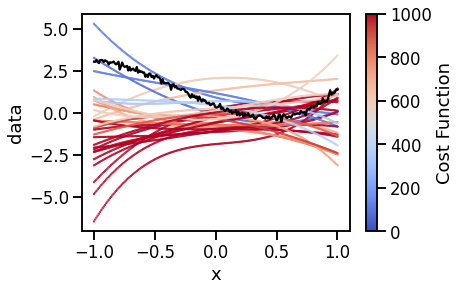

In [8]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data')
ax.set(xlabel='x', ylabel='data')
for count in range(30):
    guess_weights = np.random.normal(size=m)
    cost = (A.dot(guess_weights) - data)[:, None].T.dot(
        (A.dot(guess_weights) - data)[:, None])
    plt.scatter(x, A.dot(guess_weights), c=np.ones(n) * cost[0],
                vmin=0, vmax=1e3, s=0.5, cmap='coolwarm')
cbar = plt.colorbar()
cbar.set_label("Cost Function");

If our guess is close, this number will be close to zero.

But we don't want a function that tells us how close to the answer we are, we want the answer. What's the best fitting weight $\boldsymbol{\theta}$? We have a cost function $J (\boldsymbol \theta)$ as a function of our weights, and we want to find where this is minimized. We want to find where:

$\frac{\partial J}{\partial \boldsymbol \theta} = 0$


In other words, we have to take the partial derivative with respect to $\boldsymbol \theta$ of our function

$J (\boldsymbol \theta) = (\mathbf X \cdot \boldsymbol w - \mathbf y)^T\cdot(\mathbf X \cdot \boldsymbol w - \mathbf y)$

<small>I dropped the fraction at the front as it'll be removed when we take the derivative</small>

<small>
$J (\boldsymbol \theta) = ((\mathbf X \cdot \boldsymbol \theta)^T - \mathbf y^T)\cdot(\mathbf X \cdot \boldsymbol \theta - \mathbf y)$

$J (\boldsymbol \theta) = ((\mathbf X \cdot \boldsymbol \theta)^T \mathbf X \cdot \boldsymbol \theta) - ((\mathbf X \cdot \boldsymbol \theta)^T \cdot \mathbf y) - (\mathbf y^T \cdot (\mathbf X \cdot \boldsymbol \theta)) + \mathbf y^T \cdot \mathbf y$

$(\mathbf X \cdot \boldsymbol \theta)$ and $\mathbf y$ are vectors (and so order of operations does not matter) so we can simplify this further into

$J (\boldsymbol \theta) = \boldsymbol \theta^T  \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2(\mathbf X \cdot \boldsymbol \theta)^T \cdot \mathbf y + \mathbf y^T \cdot \mathbf y$

Taking our partial derivative

$\frac{\partial J}{\partial \boldsymbol \theta} = 2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2\mathbf X^T \cdot \mathbf y$

And then to find the minimum of this function we set this to 0

$\frac{\partial J}{\partial \boldsymbol \theta} = 2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2\mathbf X^T \cdot \mathbf y = 0$

$2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta = 2\mathbf X^T \cdot \mathbf y$

$\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta = \mathbf X^T \cdot \mathbf y$

We can multiply both sides by $(\mathbf X^T \mathbf X)^{-1}$ in order to find $\boldsymbol \theta$ 

$\boldsymbol \theta = (\mathbf X^T \cdot \mathbf X)^{-1} \cdot  \mathbf X^T \cdot \mathbf y$</small>


$\boldsymbol \theta = (\mathbf X^T \cdot \mathbf X)^{-1} \cdot  \mathbf X^T \cdot \mathbf y$

This is the so called "normal equation". Solving this will result in the best fitting weights for our system.

Let's use it!

To find our weights $\boldsymbol w$ we can write the normal equation as

$\boldsymbol w \cdot (\mathbf A^T \cdot \mathbf A) = \cdot  \mathbf A^T \cdot \mathbf y$

Now we can use the `numpy.linalg.solve` function, because $ (\mathbf A^T \cdot \mathbf A)$ is a square matrix.`numpy.linalg.solve` will solve systems like the ones above to find $\mathbf w$. We need to pass in a matrix and a vector. We can pass this into `numpy.linalg.solve` to solve using LU decomposition:

In [9]:
best_fitting_w = np.linalg.solve(A.T.dot(A), A.T.dot(data))
best_fitting_w

array([ 0.44272628, -2.89832031,  1.83194975,  2.04743625])

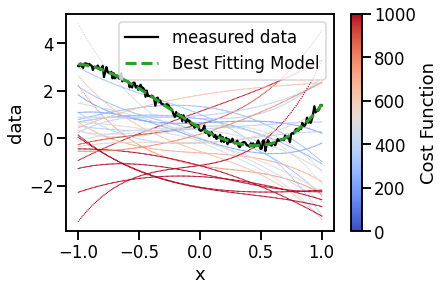

In [10]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data')
ax.set(xlabel='x', ylabel='data')
for count in range(30):
    guess_weights = np.random.normal(size=m)
    cost = (A.dot(guess_weights) - data)[:, None].T.dot((A.dot(guess_weights) - data)[:, None])[0]
    plt.scatter(x, A.dot(guess_weights), c=np.ones(n) * cost, vmin=0, vmax=1e3, s=0.5, cmap='coolwarm', lw=0.5)
cbar = plt.colorbar()
cbar.set_label("Cost Function")
# Best fitting weights:
plt.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=3, zorder=10, ls='--')
plt.legend();

We can also look at the cost function for our best fitting weights, and see it is small:

In [11]:
(A.dot(best_fitting_w) - data)[:, None].T.dot((A.dot(best_fitting_w) - data)[:, None])[0]

array([1.9587458])

And that's it! We're fitting models to data!

## Model Predictions

Now we've created a design matrix and fit to find the weights, we have a model that can provide us with **predictions** for what the data should be at any point, so long as we can create the equivalent design matrix! Let's look at the data again with the best fitting model

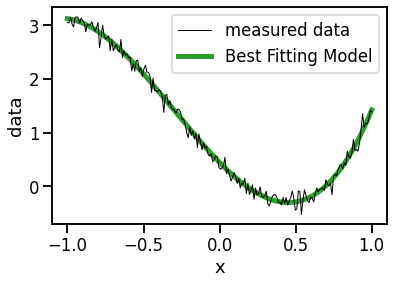

In [12]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data', lw=1)
ax.set(xlabel='x', ylabel='data')
ax.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=5, zorder=-1)
ax.legend();

Let's see what the model predicts **outside of this range!** To do this, we'll simply make a new $\mathbf{x}$ vector of new points, create a new design matrix $\mathbf{A}$ from $\mathbf{x}$, and apply the same weights.

In [13]:
# A new "x" variable, outside of our original range
x2 = np.arange(-1.2, -1, 0.01)
# Build the design matrix for this new x
A2 = np.vstack([x2**idx for idx in range(m)]).T

# Apply the same weights.
model_prediction = A2.dot(best_fitting_w)

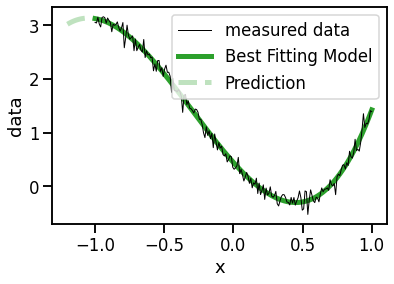

In [14]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data', lw=1)
ax.set(xlabel='x', ylabel='data')
ax.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=5, zorder=-1)
ax.plot(x2, model_prediction, color='C2', alpha=0.3, ls='--', label='Prediction', lw=5, zorder=-1)
ax.legend();

Now that we've found the weights, so long as we can build our design matrix, we can use those weights to create a model prediction at any location.

# Real Life Linear Models

We've seen how to fit linear models to data, let's look at some real data

In [15]:
import lightkurve as lk
lc = lk.search_lightcurve('Kepler-10', 
                          mission='Kepler', 
                          quarter=10, 
                          exptime=1800).download()

x, y = (lc.remove_nans().time.value[:1000],
        np.asarray(lc.remove_nans().flux.unmasked.value)[:1000])
x -= x.mean()
y /= y.mean()

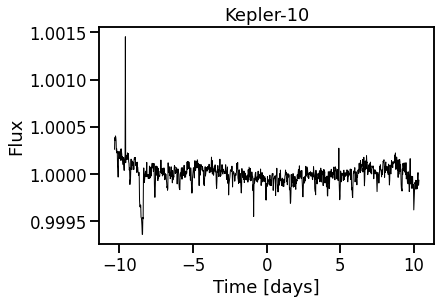

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10');

Let's build a model for this data. We'll start simple, and use a polynomial just like before

In [17]:
A = np.vstack([x ** idx for idx in range(3)]).T

In [18]:
A

array([[  1.        , -10.33453882, 106.80269269],
       [  1.        , -10.31410481, 106.38075801],
       [  1.        , -10.29367069, 105.95965637],
       ...,
       [  1.        ,  10.28330221, 105.7463043 ],
       [  1.        ,  10.30373605, 106.16697658],
       [  1.        ,  10.32416999, 106.588486  ]])

In [19]:
A.shape

(1000, 3)

In [20]:
w = np.linalg.solve(A.T.dot(A), A.T.dot(y))
w

array([ 9.99965844e-01, -2.69046494e-06,  9.58904096e-07])

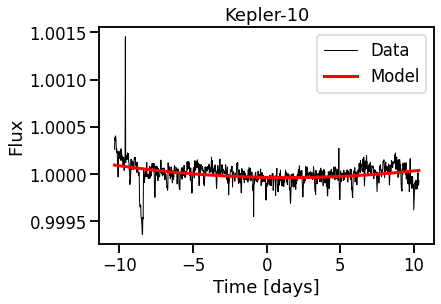

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, A.dot(w), lw=3, label='Model', c='r')
ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10')
ax.legend();

Looks great! We've got a model that fits our data, and it looks fairly accurate! It's capturing the high level trend of the data. However, we've built a very simple model, let's improve it.

### Masking

We could mask the outliers of our data in order to fit our model. There are cases where this is fairly reasonable. 
Let's look at an example:

Perhaps I have a time series that has some chance of cosmic ray hits. I know that I might expect rare, large outliers in the data, so I am reasonably certain that I can sigma clip them out.

This is information that we have that is hard to put into our linear model. Cosmic rays could happen at any time, and have any brightness. **However,** I'm assuming here that I can easily disambiguate cosmic rays from baseline variability in the target. If this is not the case, we probably need to write a new model.


Let's look at our case above, I happen to know that there are exoplanet transits in the data, so let's start by sigma clipping.

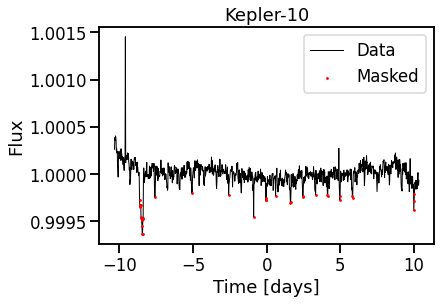

In [22]:
mask = y > 0.9998
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.scatter(x[~mask], y[~mask], lw=1, label='Masked', c='r', s=3, zorder=10)
ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10')
ax.legend();

In [23]:
w = np.linalg.solve(A[mask].T.dot(A[mask]), A[mask].T.dot(y[mask]))

# Remember we want the model to be evaluated everywhere,
# including the masked points, and so we don't mask the design matrix here.
model = A.dot(w)

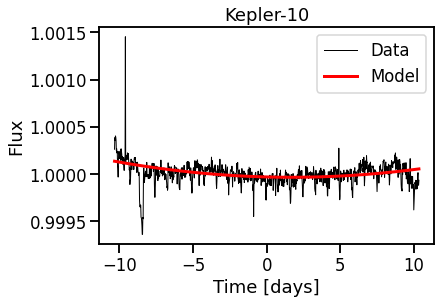

In [24]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, model, lw=3, label='Model', c='r')
ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10')
ax.legend();

This can improve our fit, but we **do have to be careful** not to mask out too many points, as this is implicitly weighting some points more than others.

## Improving the model 

In this instance we know what's going on in our model. We know that there are two exoplanets transiting the host star. What if we build a better model to fit two things:

- The exoplanet transits
- The underlying stellar variability

In this example, I've used the [exoplanet archive](https://exoplanetarchive.ipac.caltech.edu/) to get the period and transit midpoints of the exoplanets. These can be used to create a simple model for the planets:

In [25]:
period = [0.837495 , 45.29485]
t0 = [131.543749, 138.606099]
duration = [2.1305/24, 6.9236/24]

In this very simple model, let's assume that the transits of each planet around the star can be described by a "box" function, that is zero everywhere, and has some negative value during transit. (We'll then add this to some stellar model with a mean close to one.)

Below I calculate that box for our dataset:

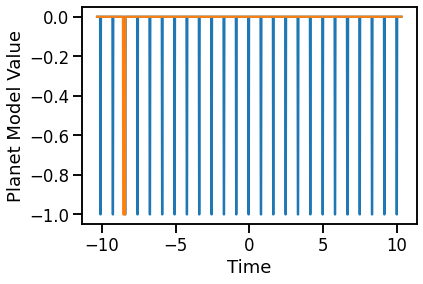

In [26]:
# Note I've used the original, un-whitened time value here
time = lc.time.value[:1000]
planets = -np.asarray([((time - t0[idx]) % period[idx] < duration[idx]/2) for idx in range(2)], float).T

fig, ax = plt.subplots()
ax.plot(x, planets)
ax.set(xlabel='Time', ylabel='Planet Model Value');

You can see that one planet transits very often (blue) and the second transit has only one event (orange). I can dot this matrix with some random weights to change the "depth" of the box, and sum up the contribution of both planets.

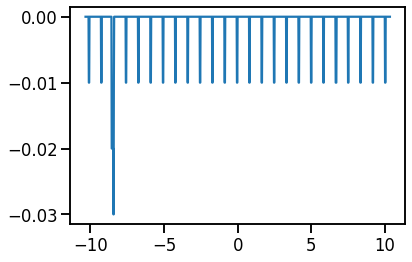

In [27]:
plt.plot(x, planets.dot([0.01, 0.02]));

Now I have a linear model for the planet transits which will allow me to fit their depths, but not period, duration or transit midpoint. 

Let's fit this simultaneously with our model for the stellar variability. To do this, all we need to do is stack the two design matrices together

In [28]:
A.shape

(1000, 3)

In [29]:
planets.shape

(1000, 2)

In [30]:
# Stack the two design matrices
A_simultaneous = np.hstack([A, planets])

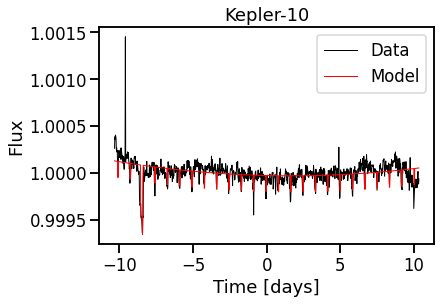

In [31]:
w = np.linalg.solve(A_simultaneous.T.dot(A_simultaneous), A_simultaneous.T.dot(y))

fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, A_simultaneous.dot(w), lw=1, label='Model', c='r')
ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10')
ax.legend();

You can see here that we have 

- Fit the stellar variability
- Accounted for the exoplanet transits
- Simultaneously fit to find the best fitting transit depth.

Now we've fit the model simultaneously, you can see that the transit model accounts for the outliers better than simply sigma clipping them out. We can now build the model just using the components from the stellar variability model.

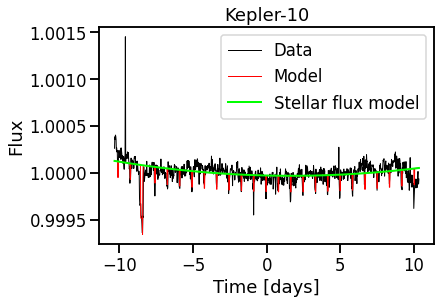

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, A_simultaneous.dot(w), lw=1, label='Model', c='r')
ax.plot(x, A_simultaneous[:, :-2].dot(w[:-2]), lw=2, label='Stellar flux model', c='lime')

ax.set(xlabel='Time [days]', ylabel='Flux', title='Kepler-10')
ax.legend()

## Systematics

Let's try this with systematics from the K2 mission. Time series from the K2 mission has a "sawtooth" pattern due to the spacecraft's roll motion during data collection

In [33]:
import lightkurve as lk
lc = lk.search_lightcurve('K2-18', 
                          mission='K2', 
                          exptime=1800)[0].download().remove_nans()

x, y = (lc.time.value[1000:2010],
        np.asarray(lc.flux.unmasked.value)[1000:2010])
x -= x.mean()
y /= y.mean()
r, c = np.nan_to_num(lc.centroid_row.unmasked.value[1000:2010]), np.nan_to_num(lc.centroid_col.unmasked.value[1000:2010])
r, c = r - r.mean(), c - c.mean()

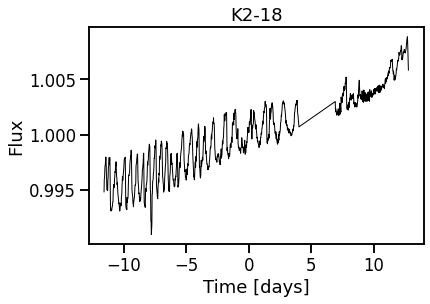

In [34]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.set(xlabel='Time [days]', ylabel='Flux', title='K2-18');

Here we are going to make an assumption.

**The roll motion in K2 causes a multiplicative systematic in the time-series. We're going to assume that because the change is small, we can approximate this with an additive model.**


How will we build a model for this? Before we could use a simple polynomial, but that won't capture the motion noise at all. We need a model for the motion. 

We're going to choose **regressors** which we reasonably believe predict the noise, and we'll find the best fitting weights of those regressors.

In this case, we're going to choose the column and row position of the target as a function of time as our regressors

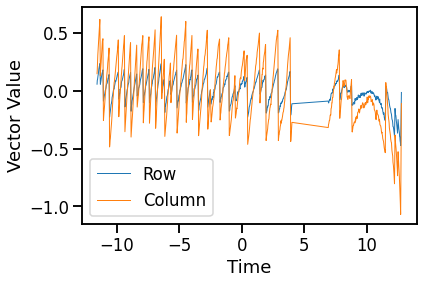

In [35]:
fig, ax = plt.subplots()
ax.plot(x, r, label='Row', lw=1)
ax.plot(x, c, label='Column', lw=1)
ax.set(xlabel='Time', ylabel='Vector Value')
ax.legend();

These look like they will well predict the motion noise in the data. Let's build a model. We're going to include

- A polynomial in time 
- A polynomial in column
- A polynomial in row

In [36]:
# Here we build a design matrix with a polynomial in time, row, and column, and row * column
A = np.vstack([*[x**idx for idx in range(2)], 
               *[r**idx for idx in range(2)],
               *[c**idx for idx in range(2)]]).T

In [37]:
A.shape

(1010, 6)

In [38]:
w = np.linalg.solve(A.T.dot(A), A.T.dot(y))

LinAlgError: Singular matrix

Oh dear, we've gotten a singular matrix error. Let's look at our design matrix

In [39]:
print(A[:5])

[[  1.         -11.56776134   1.           0.05738689   1.
    0.14786548]
 [  1.         -11.54732954   1.           0.09165481   1.
    0.18594304]
 [  1.         -11.52689783   1.           0.09855936   1.
    0.25208931]
 [  1.         -11.50646593   1.           0.11982675   1.
    0.30988645]
 [  1.         -11.48603412   1.           0.13338154   1.
    0.34498616]]


If you look carefully at the design matrix you can see that three of the columns are "1's". This creates a singular matrix because there is no **unique solution** to this problem.

If we include three identical column vectors, we can't solve to find the weights (they're degenerate). We just need to get rid of the identical columns in the matrix.

In [40]:
# Here we build a design matrix with a polynomial in time, row, and column, and row * column
A = np.vstack([*[x**idx for idx in range(2)], 
               *[r**idx for idx in range(2)][1:],
               *[c**idx for idx in range(2)]][1:]).T

w = np.linalg.solve(A.T.dot(A), A.T.dot(y))

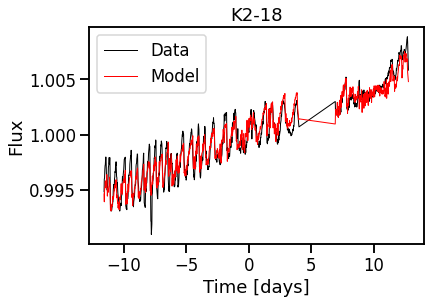

In [41]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, A.dot(w), lw=1, label='Model', c='r')
ax.set(xlabel='Time [days]', ylabel='Flux', title='K2-18')
ax.legend();

Looks great! Let's look at the residuals

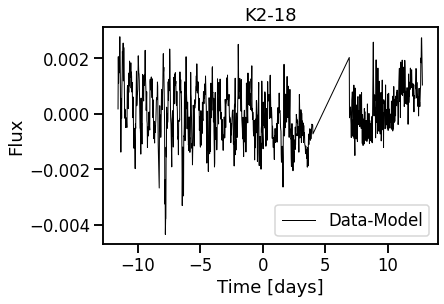

In [42]:
fig, ax = plt.subplots()
ax.plot(x, y - A.dot(w), lw=1, label='Data-Model', c='k')
ax.set(xlabel='Time [days]', ylabel='Flux', title='K2-18')

ax.legend();

We can actually improve this model by including the cross terms. That way, instead of having 3 independent, 1D polynomials, we are creating a 3D polynomial.

In [43]:
A_spatial = np.vstack([r1 * c1 for r1 in [r**idx for idx in range(2)] for c1 in [c**idx for idx in range(2)]]).T
A_time = np.vstack([x**idx for idx in range(3)]).T
A = np.vstack([t * s for t in A_time.T for s in A_spatial.T]).T

In [44]:
A.shape

(1010, 12)

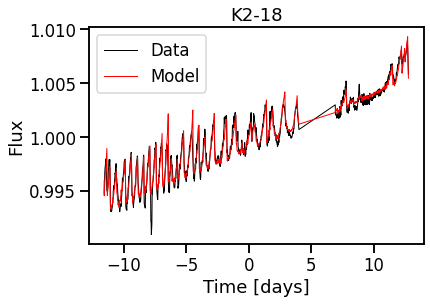

In [45]:
w = np.linalg.solve(A.T.dot(A), A.T.dot(y))
fig, ax = plt.subplots()
ax.plot(x, y, lw=1, label='Data', c='k')
ax.plot(x, A.dot(w), lw=1, label='Model', c='r')
ax.set(xlabel='Time [days]', ylabel='Flux', title='K2-18')
ax.legend();

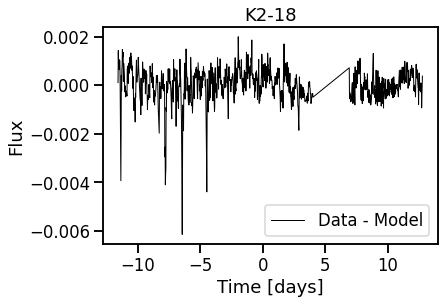

In [46]:
fig, ax = plt.subplots()
ax.plot(x, y - A.dot(w), lw=1, label='Data - Model', c='k')
ax.set(xlabel='Time [days]', ylabel='Flux', title='K2-18')

ax.legend();

## Take Aways

You've seen

- Using the Ordinary Least Squares equation you can fit a simple linear model and get the best fitting weights

- Writing models like this is convenient, and they are fast and simple to solve

- Linear models written like this can be easily broken down into each component

## Expanding on this

- It is easy to take these methods and expand them into N dimensional models

- You can include errors for a more robust fit if you use the General Least Squares equation

- You can read more about this in my [Building Fast Linear Models for Astronomers](https://christinahedges.github.io/BuildingFastLinearModels/) repository